[View in Colaboratory](https://colab.research.google.com/github/oshoolumuyiwa/pandas/blob/master/Linear_regression_with_Numpy.ipynb)

# **Dependencies**


In [0]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [0]:
#!wget https://github.com/gigwegbe/The_Math_of_Intelligence/blob/master/Week1/Intro_to_the_Math_of_intelligence-master/tensorflow/slr05.xls(If, there is more time do this!)

In [0]:
# Convert array to Numpy array
train_X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [0]:
print(train_X.shape[0])
print(train_Y.shape[0])

# **Dataset visualization**

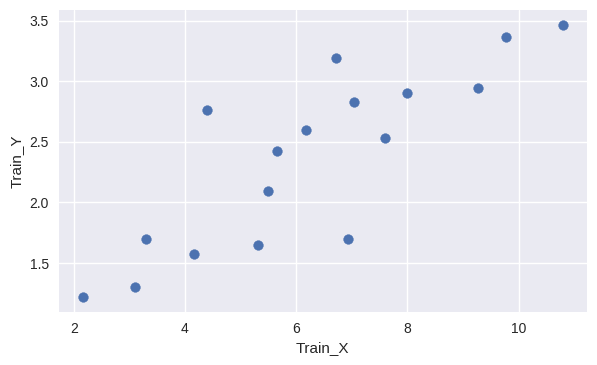

In [4]:

# Plotting example dataset# Plottin 
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(train_X,train_Y)
plt.xlabel("Train_X")
plt.ylabel("Train_Y")
plt.show()

# **Gradient Descent**

Trying to find the optimal **"m**" and** "b"** values that defines the Best fitting line.

![alt text](https://camo.githubusercontent.com/99868ce5869accd061892f9d54cd71cb884c4233/68747470733a2f2f6d656469612e7175697a697a7a2e636f6d2f7265736f757263652f67732f7175697a697a7a2d6d656469612f7175697a7a65732f4c3246776347687663335270626d646663484a765a4339696247396963793942525735434d6c56764e47777864314d3254336c5151323944564568484d486334625864795355707462584a6952315a6e53485a75575577786330686153325274626a4e3155574e5751576c4552584257566d564c546c427363446c3652326f7a52325a4e636d56474e473974626c4670517a517a654664766246564e4f456b7455533549656e4974646c59316146553455566461583345333f773d373230)

Error Metric (**Criterion**: measures the mean squared error between n elements in the input x and target y)
Our error metric can be understood as a measure of closeness
  - If the line doesn't fit at all => Error will be BIG
  - If the line fits well => Error will be SMAL
  
  AIM: We want to **reduce the error**, because doing that we are closer to the** BEST fitting line**.

SSE - Sum of Squared Error
There are several ways of measuring the error, we will be using SSE this  linear regression problem:
                            

![alt text](https://camo.githubusercontent.com/4e37490f6643d1fea845784d77235acd1c61295a/687474703a2f2f6936342e74696e797069632e636f6d2f3238747a7839672e706e67)

> What we need to compute the SSE:
          
*   The current 'm' and 'b' to know which is our current fitting line
*   The real data, that corresponds to 'target' on the equation of the image.

What we will return:


> 1. The error









In [0]:
n_samples = train_X.shape[0] # Number of samples


def SSE(m,b):
    
    totalError = 0.0
    
    for i in range(n_samples):

        # Iterate through the dataset
        x = train_X[i] # 
        y = train_Y[i] #
        
        #The real y value
        currentTarget = y
        
        #Predicted rating with our current fitting line
        #y = mx + b
        currentOutput = m*x + b
        
        #Compute squared error
        currentSquaredError = (currentTarget - currentOutput)**2

        
        #Add it to the total error
        totalError += currentSquaredError

    sse = totalError/n_samples
    
    return totalError

Example of use:

Measure the error for the fitting line:
** y = 2x + 3**

In [7]:
#Change the values of m and b
m = 2 
b = 3

sse = SSE(m,b)
print(sse)

#print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

3201.17924


**Plot**

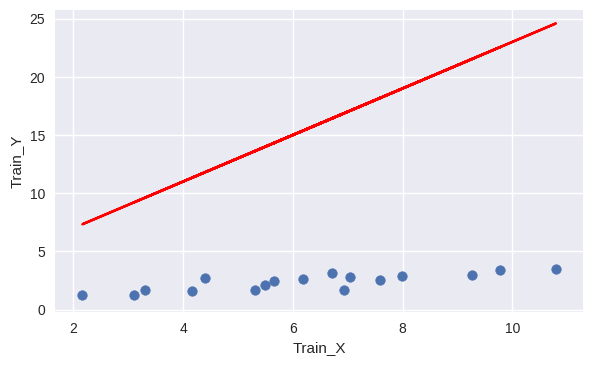

In [8]:
# Plotting example dataset# Plottin 
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.plot(train_X, m*train_X + b,color='red',label='Our Fitting Line')
plt.scatter(train_X,train_Y)
plt.xlabel("Train_X")
plt.ylabel("Train_Y")
plt.show()

In [0]:
#Change the values of m and b
m = 0.01
b = 2.62


sse = SSE(m,b)
print(sse)

print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

In [0]:

# Plotting example dataset# Plottin 
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.plot(train_X, m*train_X + b,color='red',label='Our Fitting Line')
plt.scatter(train_X,train_Y)
plt.xlabel("Train_X")
plt.ylabel("Train_Y")
plt.show()

# **Minimizing our error - Gradient Descent**

![alt text](https://camo.githubusercontent.com/834d5772d3636a6ccc320f8719a9c4b3f28379ef/687474703a2f2f7777772e6269672d646174612e746970732f77702d636f6e74656e742f75706c6f6164732f323031362f30362f6772616469656e742d74797065732e6a7067)

The strategy:
        

1.   Create an initial line
2.   Update the line parameters in a way that makes the error SMALLER

The 2nd point implies that we need a direction, a way to descend the error valley.

The way to go: Compute the partial derivatives respect to 'm' and 'b'. Get the direction that decreases the gradient (towards zero error) and update 'm' and 'b' accordingly.

What we need to compute the Gradient Descent:

1.   The **current 'm' and 'b**' to know which is our current fitting line
2.   The **real data, that corresponds to 'target'** on the equation of the image


What will do:



> **Partial derivatives** respect to 'm' and 'b'


What we will return:


1.   The** new 'better'** updated 'm' and 'b'







In [0]:
def gradient_descent_step(m,b):
    
    N = n_samples
    m_grad = 0
    b_grad = 0
    
    for i in range(N):

        #Get current pair (x,y)
        x = train_X[i]
        y = train_Y[i]

        #Partial derivative respect 'm'
        dm = -((2/N) * x * (y - (m*x + b)))
        
        #Partial derivative respect 'b'
        db = - ((2/N) * (y - (m*x + b)))
    
        #Update gradient
        m_grad = m_grad + dm
        b_grad = b_grad + db
    
    #Set the new 'better' updated 'm' and 'b'
    m_updated = m - 0.0001*m_grad
    b_updated = b - 0.0001*b_grad
    '''
    Important note: The value '0.0001' that multiplies the 'm_grad' and 'b_grad' is the 'learning rate', but it's a concept
    out of the scope of this challenge. For now, just leave that there and think about it like a 'smoother' of the learn, 
    to prevent overshooting, that is, an extremly fast and uncontrolled learning.
    '''
    
    return m_updated,b_updated

In [0]:
m = 2
b = 3



sse = SSE(m,b)

print('Starting line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

for i in range(100000):
    m,b = gradient_descent_step(m,b)
    sse = SSE(m,b)
    print('At step %d - Line: y = %.2fx + %.2f - Error: %.2f' %(i+1,m,b,sse))

print('\nBest  line: y = %.2fx + %.2f - Error: %.2f' %(m,b,sse))

In [0]:
m= 0.23
b= 0.97
x = train_X

# Plotting example dataset# Plottin 
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.plot(train_X, m*train_X + b,color='red',label='Our Fitting Line')
plt.scatter(train_X,train_Y)
plt.xlabel("Train_X")
plt.ylabel("Train_Y")
plt.show()


# **under researched but great visualization**

In [0]:
from mpl_toolkits.mplot3d import Axes3D

def error(x, y):
    return SSE(x,y)

m = np.arange(0,1,0.01)
b = np.arange(-0.5,1,0.01)


fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121, projection='3d')
ax.view_init(elev=20.0, azim=115)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z,cmap='hot')

ax.set_title('Gradient Descent')
ax.set_xlabel('slope (m)')
ax.set_ylabel('y-intercept (b)')
ax.set_zlabel('Error')

#PLOT2
ax2 = fig.add_subplot(122, projection='3d')
ax2.view_init(elev=50.0, azim=150)

X, Y = np.meshgrid(m, b)

zs = np.array([error(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

ax2.plot_surface(X, Y, Z,cmap='hot')

ax2.set_title('Gradient Descent')
ax2.set_xlabel('slope (m)')
ax2.set_ylabel('y-intercept (b)')
ax2.set_zlabel('Error')


plt.show()

# Comparing the result from the PyTorch result

from Numpy the best line: y = 0.23x + 0.97 with  Error: 2.68


from PyTorch the best  line: y= 0.25163581x + 0.79879524 with** ??**

Therefore, let's compute the error of PyTorch with the m and b a

In [0]:
m= 0.25163581
b= 0.79879524

sse = SSE(m,b)
print(sse)

print('For the fitting line: y = %sx + %s\nSSE: %.2f' %(m,b,sse))

In [0]:
#Conclusion PyTorch Model is better, however is it better  to understand how these operations work in Numpy.